In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("lsdata1.csv",header = None, index_col = False,)
lsdata1 = train_df.to_numpy()

test_df = pd.read_csv("lsdata2.csv",header = None, index_col = False,)
lsdata2 = test_df.to_numpy()

# with open('lsdata1.csv','r') as f:
#     data = list(csv.reader(f,delimiter=',',quoting = csv.QUOTE_NONNUMERIC))
# data = np.array(data)

## Part A Linear Regression

The Parameter w is 0.73088


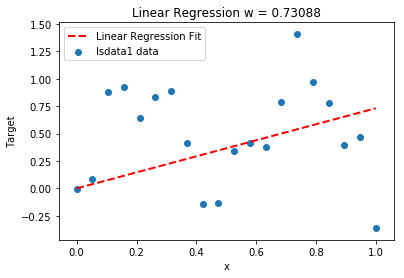

In [21]:
# Linear Regression

N_train = lsdata1.shape[0]

x_train = lsdata1[:,0].reshape(N_train,1)
y_train = lsdata1[:,1].reshape(N_train,1)

w = np.matmul(np.linalg.inv(np.matmul(x_train.transpose(),x_train)),np.matmul(x_train.transpose(),y_train))

print("The Parameter w is {:.5}".format(w[0][0]))

x_points = 100
x_fit = np.linspace(0,1,x_points)
y_fit = w[0]*x_fit

# Plot data and w parameter
plt.scatter(x_train,y_train, label = 'lsdata1 data')
plt.plot(x_fit,y_fit, linestyle = '--', color = 'red',linewidth = 2, label = 'Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('Target')
plt.title('Linear Regression w = {:.5f}'.format(w[0][0]))
plt.legend(loc=0)

plt.show()


## Part B Polynomial Basis Functions

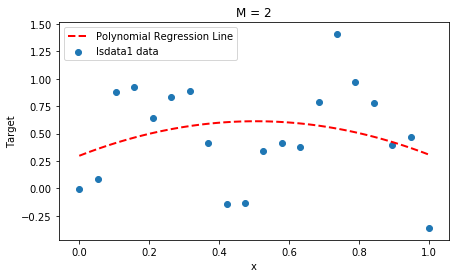

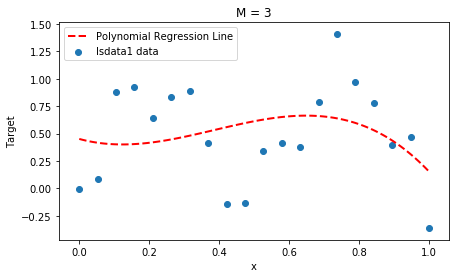

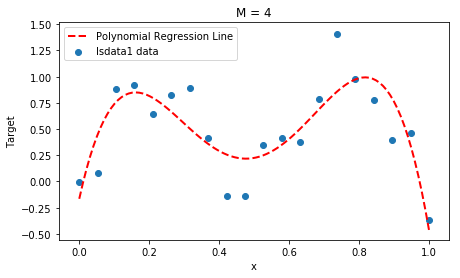

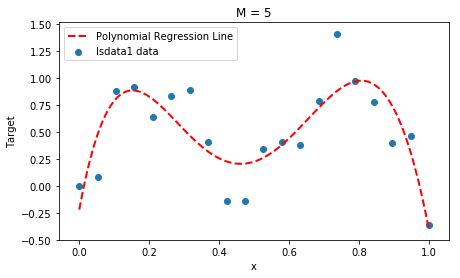

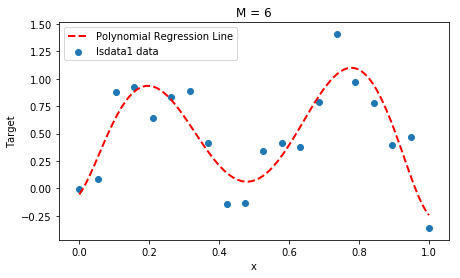

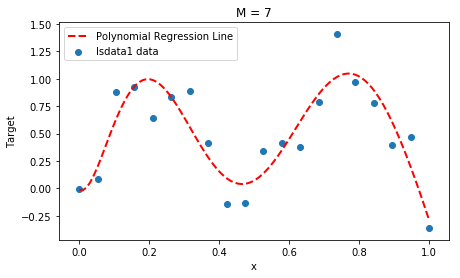

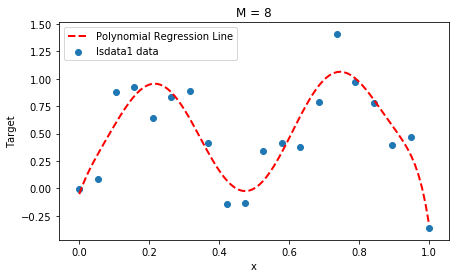

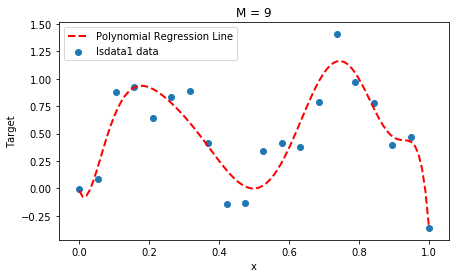

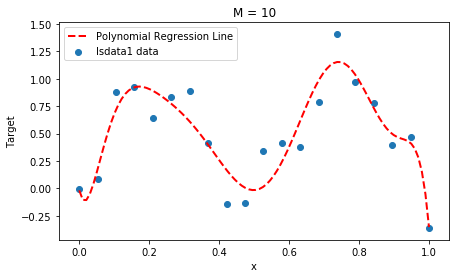

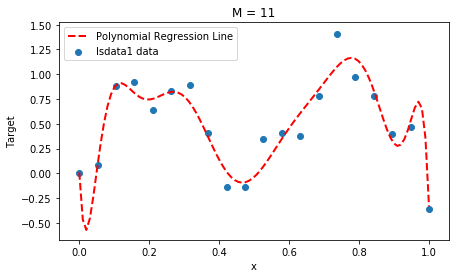

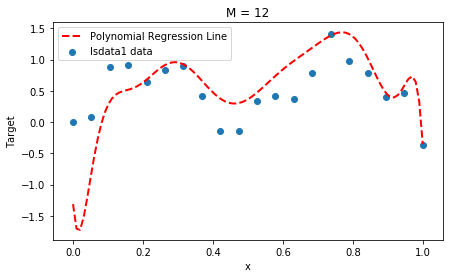

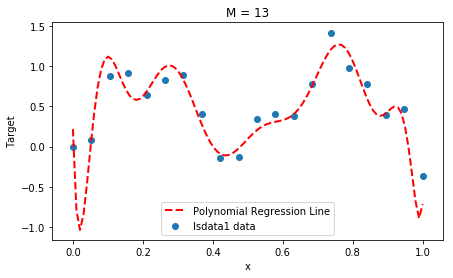

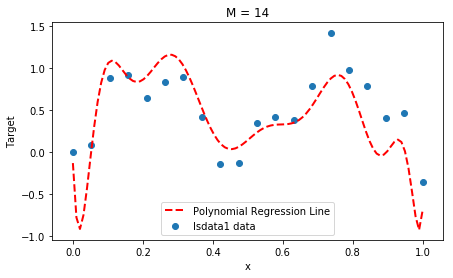

In [25]:
# Polynomial Basis Functions

# List of orders
orders = np.arange(2,15)

# list of parameters 
parameters_list = []

# Iterate through each order
for order in orders:
    
    # Init ones vectors
    phi = np.ones((N_train,1))
    
    # Init array to store data points for displaying regression line
    y_fit = np.zeros((x_points,))
    
    # Calculate phi for Mth order
    for power in range(1,int(order)+1):

        phi_power = x_train**power

        phi = np.append(phi,phi_power,1)

    # Calculate w parameters for Mth order
    w = np.matmul(np.linalg.inv(np.matmul(phi.transpose(),phi)),np.matmul(phi.transpose(),y_train))
    
    # Stores each set of parameters for Mth order
    parameters_list.append(w)
    
    # Calculates the regression line
    for power, weight in enumerate(w):
        y_fit += weight*(x_fit**power)

    # plot regression line and data
    plt.figure(figsize=(7,4))
    plt.scatter(x_train,y_train, label = 'lsdata1 data ')
    plt.plot(x_fit,y_fit,linestyle = '--', color = 'red', linewidth = 2, label = 'Polynomial Regression Line')
    plt.xlabel('x')
    plt.ylabel('Target')
    plt.title("M = {:.0f}".format(order))
    plt.legend(loc=0)


## Part B MSE Calculation

In [26]:
# Polynomial Basis Functions - MSE Calculation with test data

N_test = lsdata2.shape[0]

# Seperate Data
x_test = lsdata2[:,0]
y_test = lsdata2[:,1]

# init dataframe to store MSE calculations
MSE_df = pd.DataFrame()

# iterate through each set of parameters of M
for order,parameter in enumerate(parameters_list):

    # init array to store calculated predictions
    predict_list = np.array([])
    
    # Calculate predicted value for each x
    for x in x_test:
        
        y_predict = 0
        
        # used to iterate through each parameter
        for power,weight in enumerate(parameter):
        
            y_predict += weight*(x**power)

        # store prediction
        predict_list = np.append(predict_list,y_predict)

    # calculate MSE for Mth order
    MSE = (1/N_test)*np.sum((y_test - y_predict)**2)
    
    # Store Mth order MSE in dataframe
    error = pd.DataFrame(data = {"M order":[order+2],"MSE":MSE})

    # Append to main MSE dataframe
    MSE_df = pd.concat([MSE_df,error])

print(MSE_df)

# Best fit is order that has the lowest MSE
lowest_mse = MSE_df.loc[MSE_df['MSE'] == MSE_df['MSE'].min()]

print('------------------------------')
print("Select M = {} since it has the lowest MSE of {}".format(lowest_mse['M order'][0],lowest_mse['MSE'][0]))


M order       MSE
0        2  0.158120
0        3  0.164334
0        4  0.150035
0        5  0.146552
0        6  0.184396
0        7  0.162879
0        8  0.151593
0        9  0.149909
0       10  0.148934
0       11  0.177729
0       12  0.152666
0       13  0.146300
0       14  0.274445
------------------------------
Select M = 13 since it has the lowest MSE of 0.1462996137958776


## Part C Ridge Regression

Ridge MSE: 0.1503
Least Squares MSE: 0.1527


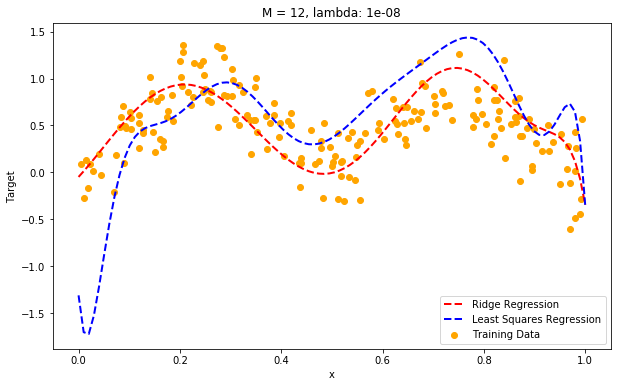

In [27]:
# Ridge Regression

# init parameters
order = 12
k = 10**(-8)
I = np.identity(order+1)

# Init array to store data points for displaying regression line
y_fit_ridge = np.zeros(x_points,)
y_fit_ls = np.zeros(x_points,)

# # Init ones vectors for phi
phi = np.ones((N_train,1))

# iterate through each order for calculating phi
for power in range(1,order+1):
    
    phi_power = x_train**power
    
    phi = np.append(phi,phi_power,axis =1)
    
# Calculate parameters
w = np.matmul(np.linalg.inv(np.matmul(phi.transpose(),phi) + k*I),np.matmul(phi.transpose(),y_train))

# Generate Regression Lines
for power,weight in enumerate(w):

    y_fit_ridge += weight*(x_fit**power)
    
for power,weight in enumerate(parameters_list[-3]):

    y_fit_ls += weight*(x_fit**power)

# Plot Data and Regression Lines
plt.figure(figsize=(10,6))

plt.scatter(x_test,y_test,color = 'orange',label = 'Training Data')
plt.plot(x_fit,y_fit_ridge,linestyle = '--', color = 'red',linewidth = 2, label = 'Ridge Regression')
plt.plot(x_fit,y_fit_ls,linestyle = '--', color = 'blue',linewidth = 2, label = 'Least Squares Regression')

plt.xlabel('x')
plt.ylabel('Target')
plt.legend(loc=0)
plt.title('M = {:.0f}, lambda: {}'.format(order,k))

# init list to store 
predict_list_ridge = np.array([])
predict_list_ls = np.array([])

# Iterate through each input x
for x in x_test:

    # init prediction value for summing over all weights and parameters
    y_predict_ridge = 0
    y_predict_ls = 0
    
    # Calculate prediction for x using ridge parameters
    for power,weight in enumerate(w):

        y_predict_ridge += weight*(x**power)
    
    # Calculate prediction for x using least squares parameters
    for power,weight in enumerate(parameters_list[-3]):

        y_predict_ls += weight*(x**power)
    
    # Append predicted_values to list
    np.append(predict_list_ridge,y_predict_ridge)
    np.append(predict_list_ridge,y_predict_ls)

# Calculate MSE for each regression method
MSE_ridge = (1/N_test)*np.sum((y_test - y_predict_ridge)**2)
MSE_ls = (1/N_test)*np.sum((y_test - y_predict_ls)**2)

print("Ridge MSE: {:.4f}".format(MSE_ridge))
print("Least Squares MSE: {:.4f}".format(MSE_ls))


####  Answer the question: How does regularized least squares regression perform compared to standard least squares regression in this instance?


<p> In comparing the ridge regression to the least squares regression for M = 12, visually the ridge regression appears to be a closer fit to the testing data. The MSE also reflects this, as the MSE of 0.1503 for ridge regression is lower than the MSE of 0.1527 for least squares. </p>